# Auto-Encoders

## 1 - Convolutional AE

In [1]:
import PIL.ImageOps

## 2 - U-Net

In [48]:
import os
import PIL
import torch
import torchvision

from torch import nn
from PIL import Image
from torch.utils.data import DataLoader
from skimage import io, transform
from torchvision import datasets, transforms, utils

In [3]:
device = (
    "cuda" if torch.cuda.is_available() 
    else "cpu"
)

print(f"Using {device} device.")

Using cuda device.


In [4]:
class UNet(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.f1 = self.create_conv_block(1, 64)
        self.p1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.f2 = self.create_conv_block(64, 128)
        self.p2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.f3 = self.create_conv_block(128, 256)
        self.p3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.f4 = self.create_conv_block(256, 512)
        self.p4 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.f5 = self.create_conv_block(512, 1024)
        self.p5 = nn.ConvTranspose2d(1024, 512, kernel_size=3, stride=2)
        
        self.f6 = self.create_conv_block(1024, 512)
        self.p6 = nn.ConvTranspose2d(512, 256, kernel_size=3, stride=2)
        
        self.f7 = self.create_conv_block(512, 256)
        self.p7 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        
        self.f8 = self.create_conv_block(256, 128)
        self.p8 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        
        self.f9 = self.create_conv_block(128, 64)
        self.p9 = nn.Conv2d(64, 1, kernel_size=1)
        
    def forward(self, x):
        x = x.to(device)
        
        f1 = self.f1(x)
        p1 = self.p1(f1)
        
        f2 = self.f2(p1)
        p2 = self.p2(f2)
        
        f3 = self.f3(p2)
        p3 = self.p3(f3)
        
        f4 = self.f4(p3)
        p4 = self.p4(f4)
        
        f5 = self.f5(p4)
        p5 = self.p5(f5)
        
        f6 = self.f6(torch.cat([f4, p5], dim=0))
        p6 = self.p6(f6)
        
        f7 = self.f7(torch.cat([f3, p6], dim=0))
        p7 = self.p7(f7)
        
        f8 = self.f8(torch.cat([f2, p7], dim=0))
        p8 = self.p8(f8)
        
        f9 = self.f9(torch.cat([f1, p8], dim=0))
        p9 = self.p9(f9)
        
        return p9
        
    def create_conv_block(self, num_channels_in, num_channels_out):
        block = nn.Sequential(
            nn.Conv2d(num_channels_in, num_channels_out, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(num_channels_out, num_channels_out, kernel_size=3, padding=1),
            nn.ReLU()
        )
        
        return block
    
    def train_model(self, data, epochs, batch_size, optimizer, loss_fn):                
        return

In [38]:
class TreemapsDataset(torch.utils.data.Dataset):
    def __init__(self, image_folder, transform=None):
        self.image_dir = image_folder
        self.transform = transform
    
    #     https://stackoverflow.com/questions/2632205/how-to-count-the-number-of-files-in-a-directory-using-python
    def __len__(self):
        files_in_dir = next(os.walk(self.image_dir))[2]
        return len(files_in_dir)
    
    def __getitem__(self, item):
        if torch.is_tensor(item):
            item = item.tolist()
            
        image = io.imread(os.path.join(self.image_dir, f"treemap_{item}.png"))
        
        if self.transform:
            image = self.transform(image)
        
        return image

In [101]:
import matplotlib.pyplot as plt
from pathlib import Path

batch_size = 3

transform = transforms.ToTensor()
dataset = TreemapsDataset(image_folder=os.path.join(Path().resolve().parents[1], "outputs\\treemaps"), transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


0 torch.Size([3, 3, 1500, 1500])


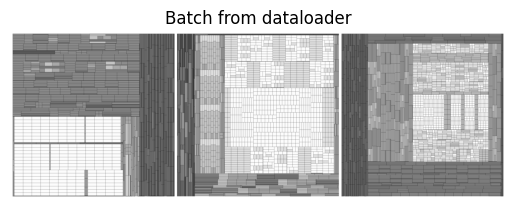

In [102]:
def show_landmarks_batch(images_batch):
    batch_size = len(images_batch)

    grid = utils.make_grid(images_batch, padding=25, pad_value=255)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

    for i in range(batch_size):

        plt.title('Batch from dataloader')
        
for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched.size())

    # observe 4th batch and stop.
    if i_batch == 0:
        plt.figure()
        show_landmarks_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break

In [ ]:
unet = UNet().to(device)

# print(unet)

image = Image.open('/outputs/treemaps/old/mcts.png')
image = PIL.ImageOps.grayscale(image)
input_img = torchvision.transforms.ToTensor()(image)

output = unet(input_img)

In [ ]:
print(output)

In [9]:
from torchvision import datasets, transforms

batch_size = 4

transforms = transforms.Compose([transforms.ToTensor()])
dataset = datasets.ImageFolder(root='outputs\\treemaps', transform=transforms)
dataset_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'outputs\\treemaps'